In [1]:
import pandas as pd
import numpy as np
import json
import math
import sys

df=pd.read_csv("C:\\Users\\giuli\\project_w_EXP\\man-shoes\\Datafiniti_Mens_Shoe_Prices.csv", error_bad_lines=False)
df=df[df['prices.currency']=='USD']

df=df[['brand','categories','prices.amountMin', 'prices.amountMax', 'reviews']]

def y(x):
    cat_def=['Casual', 'Athletic & Outdoor Shoes','Sporting Goods','Prada Sport',"Outdoor Sports", "Sports & Outdoors", 'Tennis', 'Running Shoes', 'Sneakers & Athletic Shoes', 'Team Sports', "Men's Casual Shoes", 'Basketball', 'Athletic', 'Sports & Outdoors', 'Contemporary & Designer', "Men's Outerwear", 'Outdoor', 'Walking Shoes', 'Fashion Sneakers', 'Tennis', 'Sneakers & Athletic Shoes', 'Nike Sneakers', "Men's Sneakers & Athletic Shoes", 'The Sneaker Project', 'Sneakers & Athletic', 'Sneakers']
    p=''
    for i in cat_def:
        if i in x:
            p=p+i+', '
    return p[:-2]

def g(x):
    for i in x:
        return y(x)
    
df['Categorie_Casual_Sport']= df['categories'].apply(g)

b'Skipping line 251: expected 48 fields, saw 49\nSkipping line 444: expected 48 fields, saw 50\nSkipping line 847: expected 48 fields, saw 49\nSkipping line 848: expected 48 fields, saw 49\nSkipping line 1018: expected 48 fields, saw 49\nSkipping line 1575: expected 48 fields, saw 51\nSkipping line 2133: expected 48 fields, saw 49\nSkipping line 2922: expected 48 fields, saw 51\nSkipping line 3777: expected 48 fields, saw 51\nSkipping line 4057: expected 48 fields, saw 49\nSkipping line 4239: expected 48 fields, saw 49\nSkipping line 4240: expected 48 fields, saw 49\nSkipping line 4384: expected 48 fields, saw 49\nSkipping line 4385: expected 48 fields, saw 49\nSkipping line 5388: expected 48 fields, saw 49\nSkipping line 5480: expected 48 fields, saw 49\nSkipping line 5481: expected 48 fields, saw 49\nSkipping line 5907: expected 48 fields, saw 50\nSkipping line 5908: expected 48 fields, saw 50\nSkipping line 6600: expected 48 fields, saw 49\nSkipping line 6601: expected 48 fields, sa

In [2]:
df=df[df['Categorie_Casual_Sport']!='']
df

,brand,categories,prices.amountMin,prices.amountMax,reviews,Categorie_Casual_Sport
10,NATIVE,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",45.00,45.00,NaN,"Casual, Men's Casual Shoes"
11,NATIVE,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",7.99,7.99,NaN,"Casual, Men's Casual Shoes"
12,NATIVE,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",9.99,9.99,NaN,"Casual, Men's Casual Shoes"
32,AMERICAN FIGHTER,"Clothing, Shoes & Accessories,Men's Clothing,S...",48.00,48.00,NaN,Sporting Goods
33,TOMS,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",45.90,45.90,NaN,"Casual, Men's Casual Shoes"
...,...,...,...,...,...,...
19298,Crocs,"Clothing,Shoes,Men's Shoes,Men's Casual Shoes",44.99,44.99,"[{""dateAdded"":""2017-01-27T01:33:09Z"",""dateSeen...","Casual, Men's Casual Shoes"
19304,adidas,"Clothing, Shoes & Jewelry,Men,Shoes,Athletic,R...",18.94,37.5,NaN,Athletic
19305,adidas,"Clothing, Shoes & Jewelry,Men,Shoes,Athletic,R...",18.3,37.5,NaN,Athletic
19306,Nike,"Clothing, Shoes & Accessories,Athletic,Men's S...",65.99,65.99,NaN,Athletic


__selezione preliminare di righe e colonne di interesse e riduzione sono alla macrocategoria Casual/Sportivo precedendemente preso in considerazione nell'analisi sulle recensioni. Nelle prossime celle si procede ad estrarre il rating__

In [3]:
def extract_averge_review(reviews):
    try:
        if (type(reviews) == float):
            return None
        
        if (type(reviews) != str):
            #print( f"WARN not a string but a {type(reviews)} {reviews}" )
            return None
        
        reviews = reviews.replace("\\\\", "\\")
        kvs = json.loads(reviews)
        ratings = []
        for kv in kvs:
            if("rating" in kv):
                #print( f"\n\n{kv}" )
                ratings.append( float( kv["rating"] ) )
                
        #print( f"\n\n{ratings}" )
        
        # questo blocco è per fare qualcosa di utile con i voti di un prodotto.
        # ad esempio in questo caso viene calcolata la media delle recensioni
        if len(ratings) == 0:
            return None
        else:
            total = 0.0
            for r in ratings:
                total = total + r
            avg = total / len(ratings)
            return avg        
                
    except:
        err_type, err_value, err_traceback = sys.exc_info()
        #print( f"WARN '{err_type}' '{err_value}' parsing {reviews}" )
        return None 
    
df["rating"] = df["reviews"].apply( extract_averge_review )


In [4]:
df["Categorie_Casual_Sport"].unique()

array(["Casual, Men's Casual Shoes", 'Sporting Goods', "Men's Outerwear",
       'Sporting Goods, Team Sports, Basketball',
       'Sporting Goods, Team Sports', 'Athletic',
       'Running Shoes, Athletic', 'Athletic, Nike Sneakers, Sneakers',
       'Team Sports, Basketball, Athletic', 'Casual',
       'Contemporary & Designer', 'Sneakers',
       'Running Shoes, Team Sports, Athletic', 'Casual, Athletic',
       'Sporting Goods, Team Sports, Athletic',
       "Sneakers & Athletic Shoes, Athletic, Sneakers & Athletic Shoes, Men's Sneakers & Athletic Shoes, Sneakers & Athletic, Sneakers",
       'Sporting Goods, Athletic', 'Fashion Sneakers, Sneakers',
       'Athletic, Sneakers & Athletic, Sneakers',
       'Sports & Outdoors, Athletic, Sports & Outdoors, Outdoor',
       'Sports & Outdoors, Sports & Outdoors, Outdoor', 'Team Sports',
       'Tennis, Athletic, Tennis', 'Team Sports, Athletic',
       'Running Shoes, Athletic, Outdoor', 'Outdoor', 'Basketball',
       'Walking Shoes',

__Ecco la funzione più razionale trovata per semplificare le categorie. Ricordarsi che la funzione procede in ordine, quindi è importante impostarla mettendo prima le categorie di marrgiore interesse, che altrimenti rischiano di essere accorpate alle altre. Ad accezione del modello "Sneakers" che per noi è fondamentale, le altre categorie posssono essere organizzate in modo diverso e più funzionale di queste, provate a fare di meglio nel db donna (per esempio: non so che siano le scarpe "contemporary.... forse meglio accorparle al casual?)__

In [5]:
def v(x):
    if "Sneakers" in x:
        return "Sneakers"
    elif "Casual" in x:
        return "Casual"
    elif "Outdoor" in x or "Outdoors" in x:
        return "Outdoor"
    elif "Athletic" in x:
        return "Athletic"
    elif "Contemporary":
        return "Contemporary"
        
    
    
    
df['Categorie_Casual_Sport']=df['Categorie_Casual_Sport'].apply(v)

In [6]:
df['Categorie_Casual_Sport'].unique()

array(['Casual', 'Contemporary', 'Athletic', 'Sneakers', 'Outdoor'],
      dtype=object)

In [7]:
df=df[df['Categorie_Casual_Sport']!=None]


In [8]:
df["prices.amountMax"] = pd.to_numeric(df["prices.amountMax"])
df["prices.amountMin"] = pd.to_numeric(df["prices.amountMin"])
df['medium.price']=(df['prices.amountMin']+df['prices.amountMax'])/2

df=df[['medium.price', "Categorie_Casual_Sport", "rating", "reviews" ]]



__per minimizzare il rischio di comprendee articoli che non sono scarpe seleziono il db impostando come valore minimo 15 dollari. siete d'accordo? altre porposte? per migliorare il grafico decido anche di eliminare outlier assoluti di pochissimi valori sopra i 700 dollari, anche perchè non riguardano la nostra categoria (sneakers) o il nostro mercato di interesse__

In [20]:
df=df[df['medium.price']>15]
df=df[df['medium.price']<700]

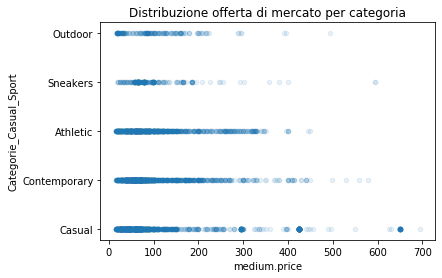

In [41]:
import matplotlib.pyplot as plot

df.plot(x="medium.price", y="Categorie_Casual_Sport", kind="scatter", alpha=0.1, s=20)
plot.title('Distribuzione offerta di mercato per categoria')
plot.show()

__proposta di interpretazione dati: il mercato delle sneakers offre un'interessante opportunità nella fascia media alta, che non è saturo come quello di fascia bassa, notiamo in particolare come potremmo agilmente "inserirci" con un prezzo sui 150 euro/dollari in quanto andiamo ad intercettare una vera e propria carenza di offerta.__

In [ ]:
df.groupby('Categorie_Casual_Sport').min().sort_values(by=['medium.price'], ascending=False)

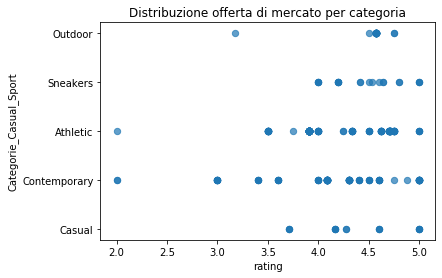

In [40]:


df.plot(x="rating", y="Categorie_Casual_Sport", kind="scatter", alpha=0.7, s=40)
plot.title('Distribuzione offerta di mercato per categoria')
plot.show()

__questo grafica mostra la distribuzione del rating in relazione alla categoria. La nostra categoria è posizionata molto bene, con i voti distribuiti tra il 4 e il 5__

